# This Notebook is for the purpose of Data Preprocessing

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
NVIDIA GeForce RTX 3080 Ti


In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

### Let's try to write a custom dataset and dataloader

In [3]:
# Define a custom dataset
class SyntheticEventDataset(Dataset):

    # Basic instantiation
    def __init__(self, csv_folder_path):
        self.csv_files = [os.path.join(csv_folder_path, f) for f in os.listdir(csv_folder_path) if f.endswith('.csv')]
        self.data = []
        
        # Load each CSV file and preprocess the data
        for file in self.csv_files:
            df = pd.read_csv(file)
            for _, row in df.iterrows():
                # Extract parameters
                chirp_mass = row['chirp_mass (sol)']
                distance = row['distance (Mpc)']
                inclination = row['inclination (rad)']
                peak_snr = row['peak_snr']
                
                # Parse JSON-encoded waveform data
                waveform = json.loads(row['waveform (normalized)'])
                
                # Append to dataset
                self.data.append((torch.tensor(waveform, dtype=torch.float32),
                                  torch.tensor(chirp_mass, dtype=torch.float32)))
    # Get length of datset    
    def __len__(self):
        return len(self.data)

    # Fetch an item from the dataset
    def __getitem__(self, idx):
        return self.data[idx]

### Declare the dataset

In [4]:
# Initialize Dataset and DataLoader
dataset_00 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_00/')
dataset_05 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_05/')
dataset_20 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_20/')
dataset_35 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_35/')
dataset_50 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_50/')
dataset_65 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_65/')
dataset_80 = SyntheticEventDataset(csv_folder_path='AssortedSNR/SNR_gt_80/')

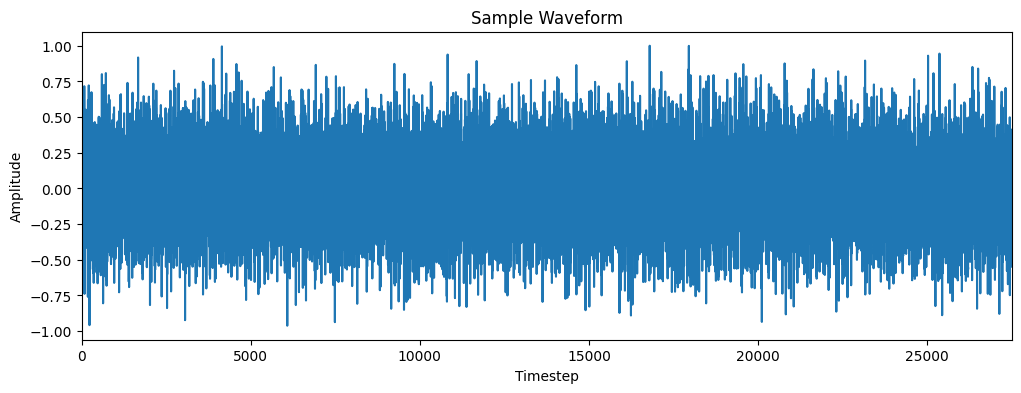

In [14]:
# Plot a sample waveform
plt.figure(figsize=(12, 4))
sample_waveform, _ = dataset_80[0]
plt.plot(sample_waveform.numpy())
plt.title("Sample Waveform")
plt.xlabel("Timestep")
plt.ylabel("Amplitude")
plt.xlim(0,27500)
plt.show()

### Let's save the dataset to a single file for convenience

In [5]:
torch.save(dataset_00, 'PyTorch_Synthetic_Data/SNR_00_dataset.pt')
torch.save(dataset_05, 'PyTorch_Synthetic_Data/SNR_05_dataset.pt')
torch.save(dataset_20, 'PyTorch_Synthetic_Data/SNR_20_dataset.pt')
torch.save(dataset_35, 'PyTorch_Synthetic_Data/SNR_35_dataset.pt')
torch.save(dataset_50, 'PyTorch_Synthetic_Data/SNR_50_dataset.pt')
torch.save(dataset_65, 'PyTorch_Synthetic_Data/SNR_65_dataset.pt')
torch.save(dataset_80, 'PyTorch_Synthetic_Data/SNR_80_dataset.pt')